In [6]:
using ExcelReaders
using DataFrames
using Quandl
using Optim
using StatPlots;

Data:

In [25]:
data = readxl(DataFrame, "data_case.xlsx", "Data!A1:F674")[:,[1, 4, 2, 3, 6, 5]]
head(data)

,Date,Commodities,Equity,Fixed income,Hedge Funds,Real Estate
1,2004-12-31T00:00:00,0.0,0.0,0.0,0.0,0.0
2,2005-01-07T00:00:00,0.0615479999999999,0.014354,0.0199,0.0281,-0.00798900000000002
3,2005-01-14T00:00:00,0.0377797329937035,-0.00377580213613793,0.00357682125698577,-0.00320980449372632,-0.00775999459683407
4,2005-01-21T00:00:00,0.00772929406991141,-0.0079958516571601,0.00127790782650172,0.00117096018735374,0.00997650137710271
5,2005-01-28T00:00:00,-0.0131484604131987,0.00657094062112207,0.00287064719336172,0.00155945419103309,-0.018528707929422
6,2005-02-04T00:00:00,-0.00927917953286472,0.0336283027974364,0.0122319755438325,0.0177111716621254,0.0329020931359938


Transform data to matrix: 

In [17]:
data_array = Array(data[:,2:6]);

Historical returns:

In [52]:
E_r = Float64[]
for i in 1:5
    push!(E_r, mean(data_array[:,i])*(365/7))
end

In [53]:
E_r

5-element Array{Float64,1}:
 0.0574371
 0.0938155
 0.044653 
 0.0231329
 0.0869345

Covariance-variance matrix:

In [54]:
S = cov(data_array)*(365/7);

In [55]:
S

5×5 Array{Float64,2}:
  0.0461404    0.0145567    -0.000339733  0.00539792  0.0125515  
  0.0145567    0.0268118     0.000483536  0.00805041  0.0272492  
 -0.000339733  0.000483536   0.00501423   0.00472928  0.000797286
  0.00539792   0.00805041    0.00472928   0.00959012  0.00681911 
  0.0125515    0.0272492     0.000797286  0.00681911  0.0433316  

State risk-free:

In [63]:
r_f = .03;

# Question 1:

### How did each of the asset classes performed throughout the whole sample period?


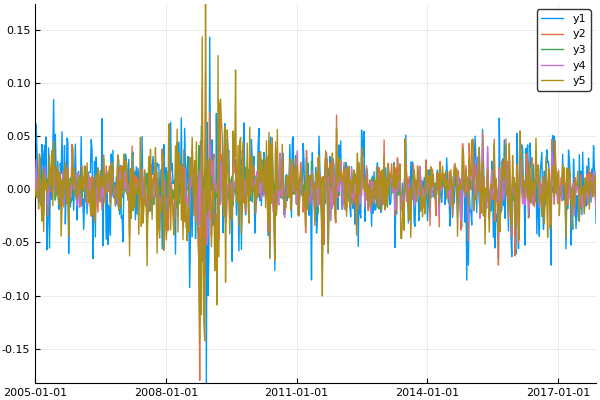

In [39]:
@df data plot(:Date,cols(2:6))

In [64]:
describe(data)

Commodities
Summary Stats:
Mean:           0.001102
Minimum:        -0.182563
1st Quartile:   -0.014701
Median:         0.002066
3rd Quartile:   0.019370
Maximum:        0.143364
Length:         673
Type:           Float64
Number Missing: 0
% Missing:      0.000000

Equity
Summary Stats:
Mean:           0.001799
Minimum:        -0.179928
1st Quartile:   -0.009936
Median:         0.003121
3rd Quartile:   0.014232
Maximum:        0.109478
Length:         673
Type:           Float64
Number Missing: 0
% Missing:      0.000000

Fixed income
Summary Stats:
Mean:           0.000856
Minimum:        -0.033792
1st Quartile:   -0.005242
Median:         0.000581
3rd Quartile:   0.006592
Maximum:        0.059763
Length:         673
Type:           Float64
Number Missing: 0
% Missing:      0.000000

Hedge Funds
Summary Stats:
Mean:           0.000444
Minimum:        -0.051908
1st Quartile:   -0.007880
Median:         0.000933
3rd Quartile:   0.008421
Maximum:        0.042825
Length:         673
Type

# Question 2:

## If there are no restrictions on short sales what would be the tangency portfolio? And if the investor is restricted on short sales? Compare the two portfolios.

### Not Restricted

__ Tangent Portfolio __

Get matrix of weights of tangent portfolio:
$$ x = \frac{S^{-1}\{E(r)-c\}}{Sum\left[S^{-1}\{E(r)-c\}\right]} $$

In [65]:
w_T_nr = *(inv(S),(E_r-r_f))/sum(*(inv(S),(E_r-r_f)))

5-element Array{Float64,1}:
  0.03958 
  1.00207 
  1.93316 
 -1.73014 
 -0.244676

_Returns of tangent portfolio_

In [66]:
E_r_T_nr = dot(w_T_nr, E_r) 

0.12131060368605417

_ Standard Deviation of tangent portfolio _

In [67]:
std_T_nr = sqrt(*(transpose(w_T_nr),S, w_T_nr))

0.10552714522547277

### Restricted

In [ ]:
rosenbrock(x) =  (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
result = optimize(rosenbrock, zeros(2), BFGS())

# Question 3:

## Assuming an investor with a quadratic function $𝑈_𝑥 = 𝐸(𝑟) − \frac{\gamma}{2} × \sigma^2$ and a risk 2 aversion level (γ) of 6, what would be the optimal portfolio if Mr. Gonzalez has no restrictions on short sales? How does your answer change if he has restrictions on short sales? Compare the two recommendations and analyze how they behave for different levels of risk aversion.

In [30]:
𝛾 = 6.;

### Not Restricted

__ Optimal Portfolio __

_ Weight of the tangent portfolio:_

$$ w_T = \frac{E(r_T)-r_f}{\gamma\sigma_T^2} $$

In [71]:
w_T_O_nr = (E_r_T_nr-r_f)/(𝛾*std_T_nr^2)

1.366600529305598

_ Return of Optimal portfolio:_

In [73]:
r_O_nr = w_T_O_nr*E_r_T_nr+(1-w_T_O_nr)*r_f

0.15478511932857533

_Investor's utility function:_

$$ U(r_O) = E(r_O) - \frac{\gamma}{2}\sigma_O^2$$

In [ ]:
U_nr = 